# Logistic Regression from Scratch

In [1]:
#Importing libaries 

import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
#Reading the dataset
df_p= pd.read_csv("penguins.csv")

In [3]:
#Displaying dataset
df_p.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [4]:
#Dimension of the datasett
df_p.shape

(344, 8)

In [5]:
#Stat of dataset
df_p.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [6]:
#Datatype of columns
df_p.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [7]:
#Printing column names
df_p.columns


Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

In [8]:
#Checking for null values
df_p.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [9]:
#Dropping Null values
df_p= df_p.dropna()


In [10]:
#Converting into category

df_p['species'] = df_p['species'].astype("category")
df_p['island'] = df_p['island'].astype("category")
df_p['sex'] = df_p['sex'].astype("category")

In [11]:
# Ordinal encoding of the categorical data
df_p['sex'].replace(['male','female'],[0,1],inplace=True)
df_p['island'].replace(['Biscoe', 'Dream', 'Torgersen'],[0,1,2],inplace=True)
df_p['species'].replace(['Adelie', 'Chinstrap', 'Gentoo'],[0,1,2],inplace=True)
df_p

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,39.1,18.7,181.0,3750.0,0,2007
1,0,2,39.5,17.4,186.0,3800.0,1,2007
2,0,2,40.3,18.0,195.0,3250.0,1,2007
4,0,2,36.7,19.3,193.0,3450.0,1,2007
5,0,2,39.3,20.6,190.0,3650.0,0,2007
...,...,...,...,...,...,...,...,...
339,1,1,55.8,19.8,207.0,4000.0,0,2009
340,1,1,43.5,18.1,202.0,3400.0,1,2009
341,1,1,49.6,18.2,193.0,3775.0,0,2009
342,1,1,50.8,19.0,210.0,4100.0,0,2009


In [12]:
#Data Normalization
df_p['body_mass_g'] = (df_p['body_mass_g']-df_p['body_mass_g'].min())/(df_p['body_mass_g'].max()-df_p['body_mass_g'].min())
df_p['flipper_length_mm'] = (df_p['flipper_length_mm']-df_p['flipper_length_mm'].min())/(df_p['flipper_length_mm'].max()-df_p['flipper_length_mm'].min())
df_p['bill_depth_mm'] = (df_p['bill_depth_mm']-df_p['bill_depth_mm'].min())/(df_p['bill_depth_mm'].max()-df_p['bill_depth_mm'].min())
df_p['bill_length_mm'] = (df_p['bill_length_mm']-df_p['bill_length_mm'].min())/(df_p['bill_length_mm'].max()-df_p['bill_length_mm'].min())


In [13]:
#Droping year column
df_p.dtypes
df_p.drop(labels='year', axis=1)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,0.254545,0.666667,0.152542,0.291667,0
1,0,2,0.269091,0.511905,0.237288,0.305556,1
2,0,2,0.298182,0.583333,0.389831,0.152778,1
4,0,2,0.167273,0.738095,0.355932,0.208333,1
5,0,2,0.261818,0.892857,0.305085,0.263889,0
...,...,...,...,...,...,...,...
339,1,1,0.861818,0.797619,0.593220,0.361111,0
340,1,1,0.414545,0.595238,0.508475,0.194444,1
341,1,1,0.636364,0.607143,0.355932,0.298611,0
342,1,1,0.680000,0.702381,0.644068,0.388889,0


In [46]:
#Splitting data into train and test set

df_p_new= df_p.sample(frac=1)

X= df_p_new[['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g']]
Y= df_p_new['sex']



indi = range(X.shape[0])
#print(indi)
train_num = int(0.8 * X.shape[0])
np.random.seed(333)
train_indi = indi[:train_num]
test_indi = indi[train_num:]
X_train, X_test = X.iloc[train_indi], X.iloc[test_indi]
Y_train, Y_test = Y.iloc[train_indi], Y.iloc[test_indi]

print(f'Xtrain: {X_train.shape}')
print(f'Xtest: {X_test.shape}')
print(f'Ytrain: {Y_train.shape}')
print(f'Ytest: {Y_test.shape}')


Xtrain: (266, 6)
Xtest: (67, 6)
Ytrain: (266,)
Ytest: (67,)


In [47]:
print(X_test)

     species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
232        2       0        0.618182       0.166667           0.677966   
309        1       1        0.687273       0.678571           0.525424   
239        2       0        0.698182       0.130952           0.779661   
249        2       0        0.538182       0.178571           0.847458   
316        1       1        0.614545       0.761905           0.644068   
..       ...     ...             ...            ...                ...   
115        0       0        0.385455       0.619048           0.406780   
164        2       0        0.487273       0.071429           0.711864   
298        1       1        0.403636       0.416667           0.254237   
0          0       2        0.254545       0.666667           0.152542   
194        2       0        0.480000       0.071429           0.644068   

     body_mass_g  
232     0.534722  
309     0.388889  
239     0.722222  
249     0.604167  
316     0.347222

In [48]:

X_train=X_train.to_numpy()
X_test.to_numpy()
Y_test=Y_test.tolist()
Y_train=Y_train.tolist()


In [49]:
#Logistic regression

class LogisticRegression:
    
    def __init__(self,X,Y,learningrate,iterations):
        self.X = X
        self.Y = Y
        self.lr = learningrate
        self.itearations = iterations
      
    def predict(self,w,X,bi):
        h1= self.sigmoid(np.dot(X,w)+bi)
        #print('************')
        #print(h1)
        al = []
        for i in range(0,len(h1)):
            if (h1[i]<0.5):
                #print(h1[i])
                al.append(0)
            else:
                #print(h1[i],'**')
                al.append(1)
        return al

    
    def sigmoid(self,z):
       # print('************')
       # print(z)
        #print('************')
        return (1/(1+np.exp(-z)))
    
    def cost(self,w):
        h = self.sigmoid(np.dot(self.X,w)+self.b)
        Y1 = np.asarray(self.Y)
        return 1/len(self.X)*(np.dot(-Y1,np.log(h))-np.dot((1-Y1),np.log(1-h)))
        
    
    def gradientdescent(self,w):
        h = self.sigmoid(np.dot(self.X,w)+self.b)
        delta = h-self.Y
        newweight=np.dot(self.X.T,delta)/len(self.X)
        newbias= np.sum(delta) / len(self.X)
        return newweight,newbias
        
    def fit(self,X,Y):
        w = np.random.uniform(0,1,size = X.shape[1]).astype(float)
        self.b=0
        costf = self.cost(w)
        loss=[costf]
        
        for i in range(0,self.itearations):
            w0,b0 = self.gradientdescent(w)
            w = w - (self.lr*w0)
            #print('************')
            #print(w)
            #print('************')
            self.b = self.b - (self.lr*b0)
            loss.append(self.cost(w))
        return w,loss,self.b
    
    

In [50]:
model_1 = LogisticRegression(X_train,Y_train,0.1,1000)
weight_1,loss_1,bias_1 = model_1.fit(X_train,Y_train)

ypredict_1 = model_1.predict(weight_1,X_test,bias_1)
#print(X_test)
#print(ypredict)
n = 0
for i in range(0,len(ypredict_1)):
    if ypredict_1[i] == Y_test[i]:
        n += 1
accuracy_1=n/len(ypredict_1)*100

print(f'Weights are  {weight_1}')
print(f'Accuracy is {accuracy_1}')


Weights are  [ 1.05711396  0.44495601 -1.98547143 -1.7696856  -1.15879154 -2.7702992 ]
Accuracy is 86.56716417910447


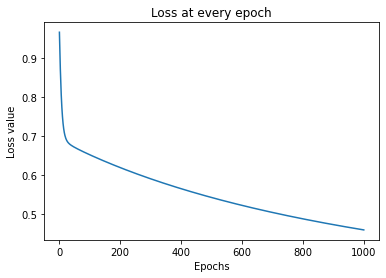

In [51]:
plt.plot(loss_1)
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.title('Loss at every epoch')
plt.show()

In [52]:
print(f'loss values  are  {loss_1}')

loss values  are  [0.9664438962090293, 0.931486851461094, 0.9000203076034273, 0.8718939721818033, 0.8469180056652996, 0.8248726985315106, 0.8055188246981306, 0.7886076755446989, 0.7738899968635519, 0.7611233394826394, 0.7500776208486157, 0.7405389292622057, 0.7323117620095864, 0.7252199736311914, 0.7191067351929563, 0.7138337888880903, 0.7092802427372992, 0.705341101623932, 0.7019256826918776, 0.6989560204188647, 0.696365331620093, 0.6940965834969764, 0.6921011878515541, 0.6903378305318625, 0.6887714357755439, 0.6873722592103471, 0.6861150998752702, 0.6849786199753682, 0.6839447605954051, 0.6829982418485236, 0.6821261366260142, 0.6813175080372713, 0.6805631016484293, 0.6798550846565781, 0.6791868251209933, 0.6785527052839574, 0.6779479638375339, 0.6773685627250567, 0.6768110747092154, 0.6762725884980214, 0.6757506287030498, 0.6752430883192222, 0.6747481717701208, 0.674264346865078, 0.6737903042711398, 0.6733249233208107, 0.6728672431608836, 0.6724164384035595, 0.6719717985727447, 0.671

In [53]:
model_2 = LogisticRegression(X_train,Y_train,0.01,1000)
weight_2,loss_2,bias_2 = model_2.fit(X_train,Y_train)

ypredict_2 = model_2.predict(weight_2,X_test,bias_2)
#print(X_test)
#print(ypredict)
n = 0
for i in range(0,len(ypredict_2)):
    if ypredict_2[i] == Y_test[i]:
        n += 1
accuracy_2=n/len(ypredict_2)*100

print(f'Weights are  {weight_2}')
print(f'Accuracy is {accuracy_2}')


Weights are  [ 0.17394867  0.00115859 -0.1329131   0.32636293 -0.25394142 -0.40865177]
Accuracy is 46.26865671641791


In [54]:
print(f'loss values  are  {loss_2}')

loss values  are  [0.8259514435909009, 0.8244629337826661, 0.8229946090324857, 0.821546232053526, 0.8201175668186217, 0.8187083786026536, 0.8173184340232521, 0.8159475010798447, 0.8145953491910627, 0.8132617492305324, 0.8119464735610707, 0.8106492960673042, 0.8093699921867401, 0.8081083389393106, 0.806864114955412, 0.8056371005024734, 0.8044270775100681, 0.8032338295936058, 0.8020571420766254, 0.8008968020117198, 0.7997525982001163, 0.7986243212099479, 0.7975117633932326, 0.7964147189016041, 0.7953329837008073, 0.7942663555839997, 0.7932146341838804, 0.7921776209836795, 0.7911551193270359, 0.7901469344267901, 0.7891528733727257, 0.7881727451382852, 0.7872063605862891, 0.7862535324736881, 0.7853140754553749, 0.7843878060870861, 0.7834745428274212, 0.7825741060390045, 0.7816863179888197, 0.7808110028477447, 0.7799479866893103, 0.7790970974877115, 0.7782581651150974, 0.7774310213381649, 0.7766154998140801, 0.7758114360857566, 0.7750186675765082, 0.7742370335841077, 0.7734663752742694, 0.7

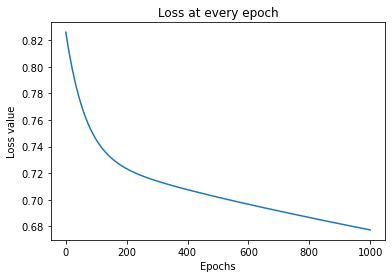

In [55]:
plt.plot(loss_2)
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.title('Loss at every epoch')
plt.show()

In [56]:
model_3 = LogisticRegression(X_train,Y_train,0.1,100000)
weight_3,loss_3,bias_3 = model_3.fit(X_train,Y_train)

ypredict_3 = model_3.predict(weight_3,X_test,bias_3)
#print(X_test)
#print(ypredict)
n = 0
for i in range(0,len(ypredict_3)):
    if ypredict_3[i] == Y_test[i]:
        n += 1
accuracy_3=n/len(ypredict_3)*100

print(f'Weights are  {weight_3}')
print(f'Accuracy is {accuracy_3}')


Weights are  [  5.61748221   0.38282581 -14.03205823  -9.95376436  -3.44622303
 -22.71435645]
Accuracy is 92.53731343283582


In [57]:
print(f'loss values  are  {loss_3}')

loss values  are  [0.9927473755342152, 0.9595175527127613, 0.9296487945929515, 0.9029828290255103, 0.8793280089278126, 0.858467895002609, 0.8401702837048162, 0.8241959089668417, 0.8103062051870517, 0.7982697328337207, 0.787867087177161, 0.7788942975298303, 0.7711648588465065, 0.7645106158614482, 0.7587817496707336, 0.7538461107805036, 0.749588114810399, 0.7459073788138564, 0.7427172358674977, 0.7399432283214671, 0.7375216484648123, 0.7353981701430194, 0.7335265957934339, 0.7318677296207343, 0.7303883782111392, 0.7290604737897836, 0.727860311690221, 0.7267678917155538, 0.7257663523723928, 0.7248414870365666, 0.7239813316629302, 0.7231758144704047, 0.7224164589748288, 0.7216961327131587, 0.7210088349450113, 0.7203495174979215, 0.7197139337238149, 0.719098511249702, 0.7185002448358216, 0.7179166062037899, 0.7173454681722808, 0.716785040845858, 0.7162338179515108, 0.7156905317146135, 0.7151541149183546, 0.7146236690044021, 0.7140984372532418, 0.7135777822351362, 0.7130611668512309, 0.71254

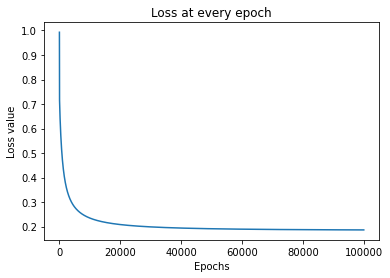

In [58]:
plt.plot(loss_3)
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.title('Loss at every epoch')
plt.show()

In [59]:
model_4 = LogisticRegression(X_train,Y_train,0.000001,100000)
weight_4,loss_4,bias_4 = model_4.fit(X_train,Y_train)

ypredict_4 = model_4.predict(weight_4,X_test,bias_4)
#print(X_test)
#print(ypredict)
n = 0
for i in range(0,len(ypredict_4)):
    if ypredict_4[i] == Y_test[i]:
        n += 1
accuracy_4=n/len(ypredict_4)*100

print(f'Weights are  {weight_4}')
print(f'Accuracy is {accuracy_4}')

Weights are  [0.9194982  0.97326896 0.70488591 0.46167857 0.10403371 0.08387048]
Accuracy is 53.73134328358209


In [60]:
print(f'loss values  are  {loss_4}')

loss values  are  [1.318253170599743, 1.3182525790008, 1.3182519874021446, 1.3182513958037763, 1.3182508042056955, 1.3182502126079017, 1.3182496210103958, 1.3182490294131766, 1.3182484378162456, 1.3182478462196017, 1.3182472546232447, 1.3182466630271754, 1.318246071431394, 1.3182454798358996, 1.3182448882406923, 1.3182442966457726, 1.3182437050511404, 1.318243113456795, 1.318242521862738, 1.3182419302689672, 1.3182413386754845, 1.3182407470822892, 1.3182401554893808, 1.3182395638967601, 1.3182389723044268, 1.3182383807123812, 1.318237789120622, 1.3182371975291511, 1.3182366059379675, 1.318236014347071, 1.3182354227564619, 1.3182348311661403, 1.318234239576106, 1.3182336479863588, 1.3182330563968996, 1.3182324648077275, 1.3182318732188425, 1.318231281630245, 1.318230690041935, 1.3182300984539121, 1.3182295068661771, 1.3182289152787292, 1.3182283236915686, 1.3182277321046953, 1.3182271405181096, 1.318226548931811, 1.3182259573458002, 1.3182253657600767, 1.3182247741746402, 1.318224182589

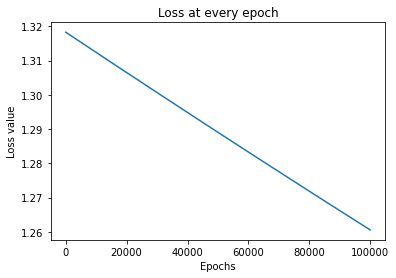

In [61]:
plt.plot(loss_4)
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.title('Loss at every epoch')
plt.show()